# Importing Our EV Data

In [54]:
import pandas as pd
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')      # Imports our .csv file containing our data
df.sample(4)                                                  # Randomly displays 4 vehicles out of 267,000+

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
107067,1N4CZ1CV8S,King,Seattle,WA,98101.0,2025,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,43.0,273832499,POINT (-122.34223 47.61085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
206985,WBY43HD0XS,King,Seattle,WA,98117.0,2025,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,36.0,280315248,POINT (-122.38418 47.70044),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
101019,WA16AAGE8R,Cowlitz,Kelso,WA,98626.0,2024,AUDI,Q8,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,19.0,261248599,POINT (-122.89867 46.14424),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301500e+10
91473,KNDCR3L11R,Snohomish,Lynnwood,WA,98036.0,2024,KIA,NIRO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,32.0,271834783,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10


In [56]:
print(df.isnull().sum())                                       # Summary of Missing Values



# Some Statistics For Better Comprehension

total_missing = (df.isnull().sum()).sum()                      # Represents Total Missing Values
percent_missing = ((total_missing/len(df)).round(4)) * 100     # Calculates percentage of Missing Values
total = len(df)


print()
print()
print(f"Our total number of Electric Vehicles is {total}!")
print(f"With only {total_missing} missing values!")
print(f"That's only {percent_missing}% of our total number of Electric Vehicles!")

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         3
Base MSRP                                              3
Legislative District                                 597
DOL Vehicle ID                                         0
Vehicle Location                                      16
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64


Our total number

# Cleaning Our Data

In [50]:
# Gets rid of irrelevant columns of data that will not be used

df = df.drop(columns=['VIN (1-10)',
                      'Postal Code',
                      'Model',
                      'Electric Vehicle Type',
                      'Electric Range',
                      'Base MSRP',
                      'Legislative District',
                      'DOL Vehicle ID',
                      '2020 Census Tract'])


# Gets rid of vehicles that are missing data values

df = df.dropna()                                    
df.sample(10)

,County,City,State,Model Year,Make,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
222152,Clark,Vancouver,WA,2018,TESLA,Clean Alternative Fuel Vehicle Eligible,POINT (-122.70303 45.70954),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
109014,Clark,Vancouver,WA,2024,HYUNDAI,Eligibility unknown as battery range has not b...,POINT (-122.49212 45.60365),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
23431,King,Carnation,WA,2021,TOYOTA,Clean Alternative Fuel Vehicle Eligible,POINT (-121.91353 47.64901),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
79898,Snohomish,Sultan,WA,2024,FORD,Eligibility unknown as battery range has not b...,POINT (-121.81688 47.8623),PUGET SOUND ENERGY INC
198130,King,Seattle,WA,2023,HYUNDAI,Eligibility unknown as battery range has not b...,POINT (-122.31307 47.66127),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
121720,Kitsap,Poulsbo,WA,2018,TOYOTA,Not eligible due to low battery range,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC
196897,King,Sammamish,WA,2022,TESLA,Eligibility unknown as battery range has not b...,POINT (-122.03539 47.61344),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
72798,King,Seattle,WA,2019,TESLA,Clean Alternative Fuel Vehicle Eligible,POINT (-122.23825 47.49461),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
90792,King,Normandy Park,WA,2023,NISSAN,Eligibility unknown as battery range has not b...,POINT (-122.34134 47.46593),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
92281,King,Kirkland,WA,2024,RIVIAN,Eligibility unknown as battery range has not b...,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


# Visualizing Our Data

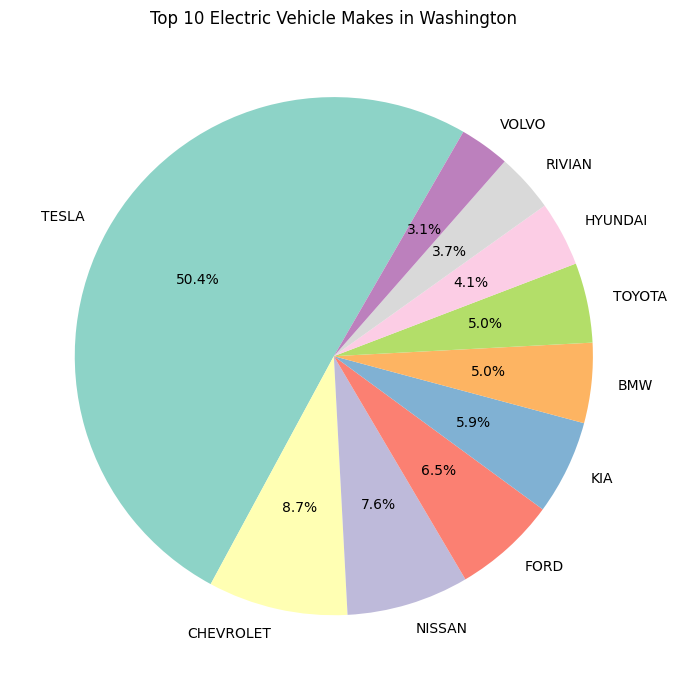

In [62]:
# Tools Needed To Visualize Data

import matplotlib.pyplot as plt         # Python's Plotting Library For Graphs/Charts
import seaborn as sns                   # Higher level library for ease of visualizing/styling the graphs


# Creating the DataFrame

make_count = df['Make'].value_counts().head(10)              # We Look At The EV Make Data
top_makes = make_count.reset_index()                         # Turns SERIES -> DataFrame
top_makes.columns = ['Make', 'Count']                        # Defines the columns of the DataFrame




# Creating Our Pie Chart

colors = sns.color_palette('Set3', n_colors=len(top_makes))  # Not Necessary, Simple Visuals

plt.figure(figsize=(7,7))                                    # Defines Pie Chart Dimensions
plt.pie(top_makes['Count'],                                  # Defines Where To Find Statistic
        labels=top_makes['Make'],                            # Defines How To Label Statistic 
        autopct='%1.1f%%',                                   # Defines Percentage Layout
        startangle =60,                                      # Defines Wedge Orientation
        colors=colors)                                       # Color For Visual
plt.title('Top 10 Electric Vehicle Makes in Washington')                                           
plt.tight_layout()
plt.show()


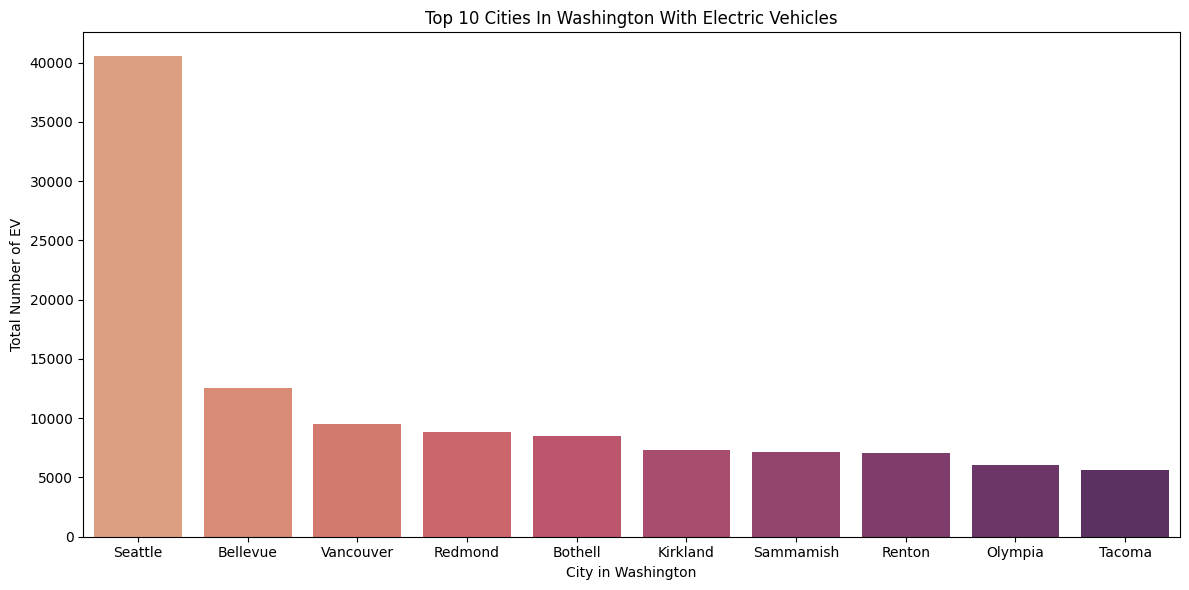

In [6]:
# Creating The Data Frame

city_count = df['City'].value_counts().head(10)              # We Look At Amount Of EV In Each City
top_city = city_count.reset_index()                          # Turn data from SERIES -> DataFrame
top_city.columns = ["City", "Total Number of EV"]            # Defines the columns




# Creating The Barplot


plt.figure(figsize=(12,6))                                   # Defines Barplot Dimensions
sns.barplot(x='City',                                        # Defines Where To Find Data For Our X-Axis
            y='Total Number of EV',                          # Defines Where To Find Data For Our Y-Axis
            data=top_city,                                   # Defines What DataFrame Is Used
            hue='City',                                      # Defines How To Base Color On (Color For Visual)
            palette='flare')                                 # Color For Visual


plt.title('Top 10 Cities In Washington With Electric Vehicles')
plt.xlabel('City in Washington')
plt.ylabel('Total Number of EV')
plt.tight_layout()
plt.show()



# Visualize via Interactive Map

In [7]:
# Defines How To Extract Longitude & Latitude From Data Frame

df['Longitude'] = df['Vehicle Location'].str.extract(r'POINT \((-?\d+\.\d+)')[0]
df['Latitude']  = df['Vehicle Location'].str.extract(r'POINT \(-?\d+\.\d+ (\d+\.\d+)')[0]

df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude']  = pd.to_numeric(df['Latitude'], errors='coerce')

`r'POINT \(` represents how the 'Vehicle Location' starts with "POINT ("

`-?` represents the POSSIBLE presence of there maybe being "-" in front of the number

`\d+` represents the presence of one or more digits

`\.` represents the presence of a decimal point

In [8]:
import folium

# Create a map centered on Washington state

ev_map = folium.Map(location=[47.5, -120], zoom_start=7)

# Add EV vehicle locations as markers (sample 500 to avoid overload)

for _, row in df.dropna(subset=['Latitude', 'Longitude']).sample(500).iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        popup=row['Make'],
        color='blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(ev_map)

# Show the map
ev_map

# Interpreting The Data

In [65]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Uncharged Teslas Have An Electric Range of '0'
# This Skews Our Data, Therefore Needs To Be Removed
# Creates Data Frame w/ ONLY Charged Teslas in the city of Seattle

tesla_only = (df['Make'] == 'TESLA') & (df['Electric Range'] > 0) & (df['City'] == 'Seattle')
all_charged_tesla = df[tesla_only]



# Finds the average range of Charged Teslas in Seattle

avg_range = int(all_charged_tesla['Electric Range'].mean())



# Finds common utility amongst ALL Teslas (Uncharged/Charged) in Seattle

utility = (df['Make'] == 'TESLA') & (df['City'] == 'Seattle')
avg_utility = df[utility]
most_common_utility = avg_utility['Electric Utility'].mode().iloc[0]


print(f"Most common utility by Teslas in Seattle: {most_common_utility}!")
print()
print(f"Average Electric Range of Teslas in Seattle: {avg_range}!")
print()
print()
print()

Most common utility by Teslas in Seattle: CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)!

Average Electric Range of Teslas in Seattle: 242!





According to *https://www.seattle.gov/city-light/residential-services/billing-information/rates#periods*.  
The Base service charge per day: `$0.3077`,  Peak Energy Charge per kWh: `$0.1656`,  Mid-Peak Energy Charge per kWh: `$0.1449`,  Off-Peak Energy Charge per kWh: `$0.0828`.  
Taking an average of the Energy charge per kWh for convenience, we can get an Average Energy Charge per kWh: `$0.1311` **Therefore, the equation that we will be using to represent Total Cost is** `Total Cost = 0.1311x + 0.3077y`   
    **Where** `x = kWh needed for a full charge` **and** `y = days observed`.

According to *https://www.tesla.com/en_qa/support/power-consumption*,  
There are 4 different Models of Tesla (Model S, Model X, Model Y, Model 3), with 20 different variations of these Models in total. Taking the average of each Model's *kWh consumption per 100km*, we get the following averages:     
**Model S:** `18.1`, **Model X:** `19.95`, **Model Y:** `15.59`, **Model 3:** `14.73`,**Combined Average:** `15.975`

Converting Average Electric Range into km, we get an Average Electric Range of Teslas in Seattle: `389.46km`.  
Therefore, to calculate the new consumption values in terms of Average Electric Range use: `(389.46/100) * Tesla Model`. New Values: **Model S:** `70.49`, **Model X:** `77.70`, **Model Y:** `60.72`, **Model 3:** `57.38`,**Combined Average:** `62.22`.  
As expected, these new consumption values reflects the company's average kWh needed to full charge a Tesla, as according to *https://electriccartalks.com/how-many-kwh-to-charge-a-tesla/*

In [72]:
# Creating Tesla DataFrame

data = {'Tesla Model': ['Model S', 'Model X', 'Model Y', 'Model 3', 'Combined'],
        'kWh Consumption (/100km)': [18.1, 19.95, 15.59, 14.73, 15.975],
        'kWh Consumption (Avg. Range)': [70.49, 77.70, 60.72, 57.38, 62.22]}
teslasdf = pd.DataFrame(data)




# Using Our Equations In Our DataFrame

avg_charge = 0.1311
base_charge = 0.3077 * 30                               # Default Base Pay For 30 Days / 1 Month

# Refer To The Equation To Represent Total Cost

teslasdf['Cost To Charge ($)'] = (avg_charge * teslasdf['kWh Consumption (Avg. Range)'] + base_charge).round(2)
teslasdf

,Tesla Model,kWh Consumption (/100km),kWh Consumption (Avg. Range),Type,Cost To Charge ($)
0,Model S,18.100,70.49,Electric,18.47
1,Model X,19.950,77.70,Electric,19.42
2,Model Y,15.590,60.72,Electric,17.19
3,Model 3,14.730,57.38,Electric,16.75
4,Combined,15.975,62.22,Electric,17.39


# Comparative Analysis: Teslas  vs.  Gas Car (Top 5 Popular Cars in Washington)

According to *https://stacker.com/stories/washington/most-popular-used-cars-washington*,  
The Top 5 Most Popular Cars in Washington is: **#1. Ford F-150 , #2. Toyota Tacoma , #3. Ram 1500 , #4. Chevrolet Silverado 1500, #5. Honda Civic.** Utilizing *https://www.fueleconomy.gov/*, we will create a similar DataFrame as Tesla using the following variables: `Gas Consumption`, `Gas Consumption (Avg. Range)`, and `Cost To Fill`.  
(*Note the following data comes from their 2025 models, 2WD, and based on regular gasoline.)

In [75]:
# Creating Top 5 Popular Cars (WA) DataFrame

car_data = {'Car Make': ['Ford F-150', 'Toyota Tacoma', 'Ram 1500', 'Chevy Silverado 1500', 'Honda Civic'],
            'MPG (Combined City/HW)': [20, 23, 22, 19, 49],
            'Gallons Needed (242 mi)': [12.1, 10.52, 11, 15.13, 4.94]}
carsdf = pd.DataFrame(car_data)



# Using Equation To Calculate Cost

avg_gas_price = 4.42
carsdf['Cost To Drive ($)'] = (carsdf['Gallons Needed (242 mi)'] * avg_gas_price).round(2)
carsdf

,Car Make,MPG (Combined City/HW),Gallons Needed (242 mi),Cost To Drive ($)
0,Ford F-150,20,12.10,53.48
1,Toyota Tacoma,23,10.52,46.50
2,Ram 1500,22,11.00,48.62
3,Chevy Silverado 1500,19,15.13,66.87
4,Honda Civic,49,4.94,21.83


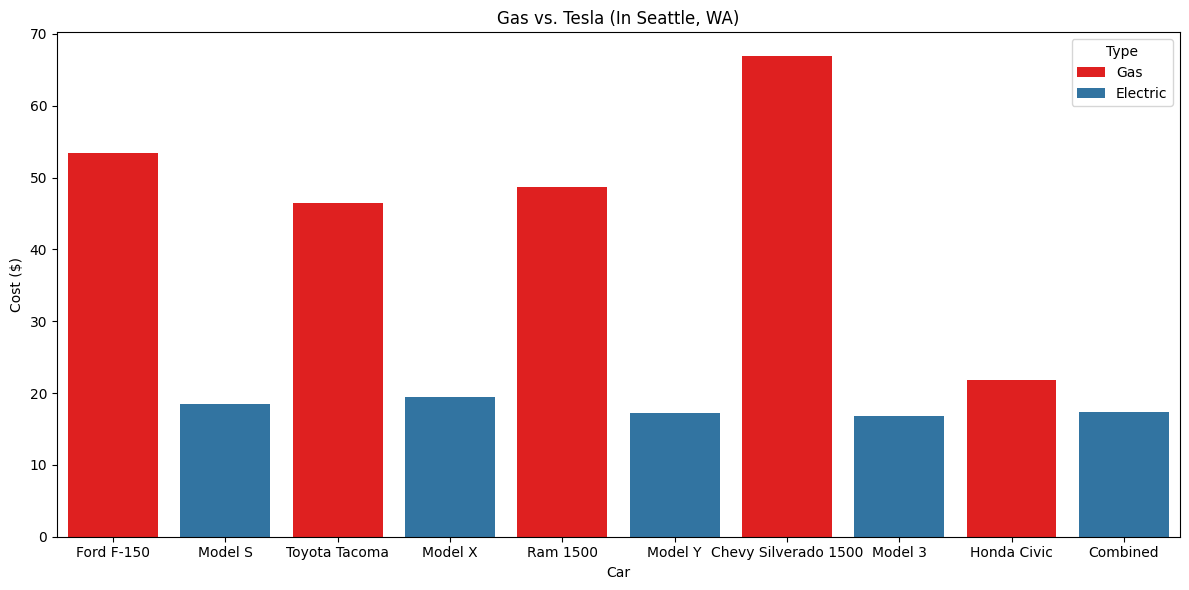

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns



# Creating Identical Format To Concatonate The Two DataFrames

teslasdf['Model'] = teslasdf['Tesla Model']
teslasdf['Cost ($)'] = teslasdf['Cost To Charge ($)']
teslasdf['Type'] = 'Electric'

carsdf['Model'] = carsdf['Car Make']
carsdf['Cost ($)'] = carsdf['Cost To Drive ($)']
carsdf['Type'] = 'Gas'

tesla_df = teslasdf[['Model', 'Type', 'Cost ($)']]
cars_df = carsdf[['Model', 'Type', 'Cost ($)']]




# Creating Alternating Data Frame

df_final = pd.DataFrame([row for pair in zip(cars_df.values, tesla_df.values) for row in pair],
                        columns=['Model', 'Type', 'Cost ($)'])


plt.figure(figsize=(12,6))
sns.barplot(x='Model', 
            y='Cost ($)', 
            data=df_final, 
            hue='Type', 
            palette={'Electric': '#1f77b4', 'Gas': '#FF0000'})
plt.title('Gas vs. Tesla (In Seattle, WA)')
plt.xlabel('Car')
plt.ylabel('Cost ($)')
plt.tight_layout()
plt.show()

# Conclusions

Based on the following visuals, we can conclude the following:  
- The Most Popular Electric Vehicle Make In Washington Is: Tesla
- The Most Popular EV's Consist Of, But Not Limited To, Tesla, Chevrolet, Nissan, Ford, Kia, BMW, Toyota, Hyundai, Rivian, Volvo
- The Top City With The Most EV's In Washington Is: Seattle
- The Top Cities With The Most EV's In Washington Consist Of, But Not Limited To, Seattle, Bellevue, Vancouver, Redmond, Bothell, Kirkland, Sammamish, Renton, Olympia, and Tacoma
- The Total Cost To Charge Various Tesla Models
- The Significant Margin In Cost Between Charging A Tesla & Filling Up A Traditional Gas Vehicle